# Лабораторная работа 4, Лохматов Никита Игоревич М8О-406Б-21

## 1. Выбор начальных условий в ЛР 1

## 2. Создание бейзлайна и оценка качества

### a. Обучение модели из sklearn для классификации и оценка качества моделей по выбранным метрикам

Импортируем библиотеки

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import root_mean_squared_error, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

Сделаем предобработку данных

In [ ]:
# Загрузка данных
shelter_data = pd.read_csv('../datasets/shelter_animal_outcomes.csv')

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

Обучение модели

In [23]:
# Инициализация и обучение модели случайного леса
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train_shelter, y_train_shelter)

RandomForestClassifier()

Оценка качества модели

Accuracy: 0.74
F1 Score: 0.68
Recall: 0.64
Precision: 0.72


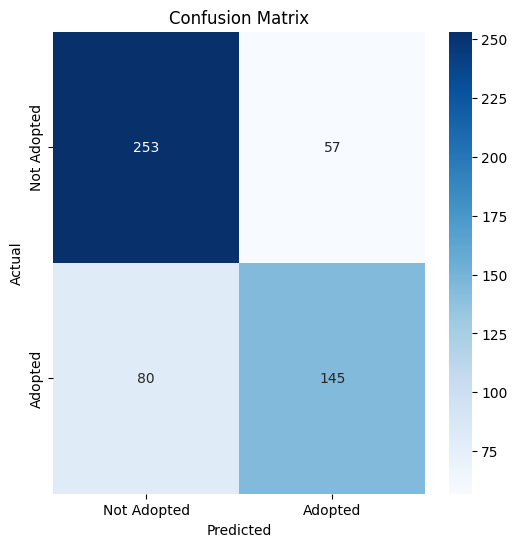

In [26]:
# Предсказание
y_pred_shelter = forest_clf.predict(X_test_shelter)

# Метрики качества
accuracy = accuracy_score(y_test_shelter, y_pred_shelter)
f1 = f1_score(y_test_shelter, y_pred_shelter)
recall = recall_score(y_test_shelter, y_pred_shelter)
precision = precision_score(y_test_shelter, y_pred_shelter)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_shelter, y_pred_shelter)

# Визуализация Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### b. Обучение модели из sklearn для регрессии и оценка качества моделей по выбранным метрикам

Сделаем предобработку данных

In [ ]:
# Загрузка данных
house_data = pd.read_csv('../datasets/kc_house_data.csv')

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house, y_house, test_size=0.2, random_state=42
)

Обучение модели

In [30]:
# Инициализация и обучение модели случайного леса
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_house, y_train_house)

RandomForestRegressor()

Оценка качества модели

In [32]:
# Предсказание
y_pred_house = forest_reg.predict(X_test_house)

# Метрики качества
mae = mean_absolute_error(y_test_house, y_pred_house)
rmse = root_mean_squared_error(y_test_house, y_pred_house)
r2 = r2_score(y_test_house, y_pred_house)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Absolute Error (MAE): 133456.98
Root Mean Squared Error (RMSE): 194932.45
R^2 Score: 0.68


## 3. Улучшение бейзлайна

### a. Сформулировать гипотезы (препроцессинг данных, визуализация данных, формирование новых признаков, подбор гиперпараметров на кросс-валидации и т.д.)

1. Улучшение предобработки данных: нормализация или стандартизация

2. Формирование новых признаков на основе комбинации существующих

3. Подбор гиперпараметров: Grid Search с кросс-валидацией для оптимизации модели

### b.1 Проверка гипотез для задачи классификации

1. Улучшение предобработки данных (масштабирование и нормализация)

In [33]:
# Масштабирование данных
scaler_shelter = StandardScaler()
X_train_shelter_scaled = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter_scaled = scaler_shelter.transform(X_test_shelter)

# Обучение модели случайного леса
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train_shelter_scaled, y_train_shelter)

# Предсказание и метрики
y_pred_shelter_scaled = forest_clf.predict(X_test_shelter_scaled)

accuracy_scaled = accuracy_score(y_test_shelter, y_pred_shelter_scaled)
f1_scaled = f1_score(y_test_shelter, y_pred_shelter_scaled)
recall_scaled = recall_score(y_test_shelter, y_pred_shelter_scaled)
precision_scaled = precision_score(y_test_shelter, y_pred_shelter_scaled)

# Вывод результатов
print("Гипотеза 1: масштабирование")
print(f"Accuracy: {accuracy_scaled:.2f}")
print(f"F1 Score: {f1_scaled:.2f}")
print(f"Recall: {recall_scaled:.2f}")
print(f"Precision: {precision_scaled:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_scaled - accuracy:.2f}")
print(f"Разница в F1 Score: {f1_scaled - f1:.2f}")

Гипотеза 1: масштабирование
Accuracy: 0.75
F1 Score: 0.68
Recall: 0.63
Precision: 0.73

Сравнение с бейзлайном:
Разница в Accuracy: 0.00
Разница в F1 Score: -0.00


2. Формирование новых признаков

In [34]:
# Создание нового признака: возраст животного в днях
def age_in_days(age_str):
    if isinstance(age_str, str):
        num, unit = age_str.split()
        num = int(num)
        if 'year' in unit:
            return num * 365
        elif 'month' in unit:
            return num * 30
        elif 'week' in unit:
            return num * 7
        elif 'day' in unit:
            return num
    return 0

X_shelter['AgeInDays'] = shelter_data['AgeuponOutcome'].apply(age_in_days)

# Бинарное кодирование типа животного
X_shelter['IsDog'] = (shelter_data['AnimalType'] == 'Dog').astype(int)

# Обновляем обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Масштабирование данных
scaler_shelter = StandardScaler()
X_train_shelter_scaled = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter_scaled = scaler_shelter.transform(X_test_shelter)

# Обучение модели случайного леса
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train_shelter_scaled, y_train_shelter)

# Предсказание и метрики
y_pred_shelter_new_feature = forest_clf.predict(X_test_shelter_scaled)

accuracy_new_feature = accuracy_score(y_test_shelter, y_pred_shelter_new_feature)
f1_new_feature = f1_score(y_test_shelter, y_pred_shelter_new_feature)
recall_new_feature = recall_score(y_test_shelter, y_pred_shelter_new_feature)
precision_new_feature = precision_score(y_test_shelter, y_pred_shelter_new_feature)

# Вывод результатов
print("Гипотеза 2: добавление нового признака")
print(f"Accuracy: {accuracy_new_feature:.2f}")
print(f"F1 Score: {f1_new_feature:.2f}")
print(f"Recall: {recall_new_feature:.2f}")
print(f"Precision: {precision_new_feature:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_new_feature - accuracy:.2f}")
print(f"Разница в F1 Score: {f1_new_feature - f1:.2f}")

Гипотеза 2: добавление нового признака
Accuracy: 0.76
F1 Score: 0.69
Recall: 0.64
Precision: 0.74

Сравнение с бейзлайном:
Разница в Accuracy: 0.01
Разница в F1 Score: 0.01


3. Подбор гиперпараметров

In [35]:
# Масштабирование данных
scaler_shelter = StandardScaler()
X_train_shelter_scaled = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter_scaled = scaler_shelter.transform(X_test_shelter)

# Определяем сетку гиперпараметров
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1')
grid_search.fit(X_train_shelter_scaled, y_train_shelter)

# Лучшие параметры и их оценка
best_forest_clf = grid_search.best_estimator_
best_score = grid_search.best_score_

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая кросс-валидация: {best_score:.2f}")
print()

# Предсказание с лучшими параметрами
y_pred_best = best_forest_clf.predict(X_test_shelter_scaled)

accuracy_best = accuracy_score(y_test_shelter, y_pred_best)
f1_best = f1_score(y_test_shelter, y_pred_best)
recall_best = recall_score(y_test_shelter, y_pred_best)
precision_best = precision_score(y_test_shelter, y_pred_best)

# Вывод результатов
print("Гипотеза 3: подбор гиперпараметров")
print(f"Accuracy: {accuracy_best:.2f}")
print(f"F1 Score: {f1_best:.2f}")
print(f"Recall: {recall_best:.2f}")
print(f"Precision: {precision_best:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_best - accuracy:.2f}")
print(f"Разница в F1 Score: {f1_best - f1:.2f}")

Лучшие параметры: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Лучшая кросс-валидация: 0.66

Гипотеза 3: подбор гиперпараметров
Accuracy: 0.76
F1 Score: 0.69
Recall: 0.64
Precision: 0.75

Сравнение с бейзлайном:
Разница в Accuracy: 0.01
Разница в F1 Score: 0.01


### b.2 Проверка гипотез для задачи регрессии

1. Улучшение предобработки данных (масштабирование и нормализация)

In [38]:
# Масштабирование данных
scaler_house = StandardScaler()
X_train_house_scaled = scaler_house.fit_transform(X_train_house)
X_test_house_scaled = scaler_house.transform(X_test_house)

# Обучение модели случайного леса
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_house_scaled, y_train_house)

# Предсказание и метрики
y_pred_house_scaled = forest_reg.predict(X_test_house_scaled)
mae_scaled = mean_absolute_error(y_test_house, y_pred_house_scaled)
rmse_scaled = root_mean_squared_error(y_test_house, y_pred_house_scaled)
r2_scaled = r2_score(y_test_house, y_pred_house_scaled)

# Вывод результатов
print("Гипотеза 1: масштабирование")
print(f"Mean Absolute Error (MAE): {mae_scaled:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_scaled:.2f}")
print(f"R-squared (R^2): {r2_scaled:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_scaled - mae:.2f}")
print(f"Разница в RMSE: {rmse_scaled - rmse:.2f}")
print(f"Разница в R^2: {r2_scaled - r2:.2f}")

Гипотеза 1: масштабирование
Mean Absolute Error (MAE): 132767.93
Root Mean Squared Error (RMSE): 194119.89
R-squared (R^2): 0.68

Сравнение с бейзлайном:
Разница в MAE: -689.04
Разница в RMSE: -812.56
Разница в R^2: 0.00


2. Формирование новых признаков

In [39]:
# Создание нового признака: общая площадь дома
X_house['total_area'] = X_house['sqft_living'] + X_house['sqft_basement']

# Обновляем данные
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house, y_house, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler = StandardScaler()
X_train_house_scaled = scaler.fit_transform(X_train_house)
X_test_house_scaled = scaler.transform(X_test_house)

# Обучение модели случайного леса
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_house_scaled, y_train_house)

# Предсказание и метрики
y_pred_house_new_feature = forest_reg.predict(X_test_house_scaled)
mae_new_feature = mean_absolute_error(y_test_house, y_pred_house_new_feature)
rmse_new_feature = root_mean_squared_error(y_test_house, y_pred_house_new_feature)
r2_new_feature = r2_score(y_test_house, y_pred_house_new_feature)

# Вывод результатов
print("Гипотеза 2: добавление нового признака")
print(f"Mean Absolute Error (MAE): {mae_new_feature:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_new_feature:.2f}")
print(f"R-squared (R^2): {r2_new_feature:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_new_feature - mae:.2f}")
print(f"Разница в RMSE: {rmse_new_feature - rmse:.2f}")
print(f"Разница в R^2: {r2_new_feature - r2:.2f}")

Гипотеза 2: добавление нового признака
Mean Absolute Error (MAE): 132617.15
Root Mean Squared Error (RMSE): 192575.35
R-squared (R^2): 0.69

Сравнение с бейзлайном:
Разница в MAE: -839.83
Разница в RMSE: -2357.10
Разница в R^2: 0.01


3. Подбор гиперпараметров

In [40]:
# Масштабирование данных
scaler = StandardScaler()
X_train_house_scaled = scaler.fit_transform(X_train_house)
X_test_house_scaled = scaler.transform(X_test_house)

# Определяем сетку гиперпараметров
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_house_scaled, y_train_house)

# Лучшие параметры и их оценка
best_forest_reg = grid_search.best_estimator_
best_score = -grid_search.best_score_  # Инвертируем, так как использовался отрицательный MAE

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая кросс-валидация (MAE): {best_score:.2f}")
print()

# Предсказание с лучшими параметрами
y_pred_house_gs = best_forest_reg.predict(X_test_house_scaled)
mae_gs = mean_absolute_error(y_test_house, y_pred_house_gs)
rmse_gs = root_mean_squared_error(y_test_house, y_pred_house_gs)
r2_gs = r2_score(y_test_house, y_pred_house_gs)

# Вывод результатов
print("Гипотеза 3: подбор гиперпараметров")
print(f"Mean Absolute Error (MAE): {mae_gs:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gs:.2f}")
print(f"R-squared (R^2): {r2_gs:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_gs - mae:.2f}")
print(f"Разница в RMSE: {rmse_gs - rmse:.2f}")
print(f"Разница в R^2: {r2_gs - r2:.2f}")

Лучшие параметры: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Лучшая кросс-валидация (MAE): 141647.69

Гипотеза 3: подбор гиперпараметров
Mean Absolute Error (MAE): 130767.72
Root Mean Squared Error (RMSE): 192269.58
R-squared (R^2): 0.69

Сравнение с бейзлайном:
Разница в MAE: -2689.26
Разница в RMSE: -2662.87
Разница в R^2: 0.01


### c. Формирование улучшенного бейзлайна

В улучшенном бейзлайне для классификации добавим масштабирование, параметры: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}, а также новый признак: AgeInDays и IsDog

В улучшенном бейзлайне для регрессии добавим масштабирование, параметры: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}, а также добавим новый признак: total_area

Классификация

In [ ]:
# Загрузка данных
shelter_data = pd.read_csv('../datasets/shelter_animal_outcomes.csv')

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Создание нового признака: возраст животного в днях
def age_in_days(age_str):
    if isinstance(age_str, str):
        num, unit = age_str.split()
        num = int(num)
        if 'year' in unit:
            return num * 365
        elif 'month' in unit:
            return num * 30
        elif 'week' in unit:
            return num * 7
        elif 'day' in unit:
            return num
    return 0

X_shelter['AgeInDays'] = shelter_data['AgeuponOutcome'].apply(age_in_days)

# Бинарное кодирование типа животного
X_shelter['IsDog'] = (shelter_data['AnimalType'] == 'Dog').astype(int)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

# Масштабирование
scaler_shelter = StandardScaler()
X_train_shelter = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter = scaler_shelter.transform(X_test_shelter)

forest_clf = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200)

Регрессия

In [ ]:
# Загрузка данных
house_data = pd.read_csv('../datasets/kc_house_data.csv')

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная


# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Нормализация числовых признаков (важно для KNN)
scaler = StandardScaler()
X_house_scaled = pd.DataFrame(scaler.fit_transform(X_house), columns=X_house.columns)

# Создание нового признака: общая площадь дома
X_house['total_area'] = X_house['sqft_living'] + X_house['sqft_basement']

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler = StandardScaler()
X_train_house = scaler.fit_transform(X_train_house)
X_test_house = scaler.transform(X_test_house)

forest_reg = RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200)

d. Обучение модели с улучшенным бейзлайном 

Классификация

In [52]:
forest_clf.fit(X_train_shelter, y_train_shelter)

RandomForestClassifier(min_samples_split=5, n_estimators=200)

Регрессия

In [53]:
forest_reg.fit(X_train_house, y_train_house)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200)

e. Оценка качества моделей с улучшенным бейзлайном 

Классификация

In [54]:
# Предсказание
y_pred_shelter_best = forest_clf.predict(X_test_shelter)

# Метрики качества
accuracy_best = accuracy_score(y_test_shelter, y_pred_shelter_best)
f1_best = f1_score(y_test_shelter, y_pred_shelter_best)
recall_best = recall_score(y_test_shelter, y_pred_shelter_best)
precision_best = precision_score(y_test_shelter, y_pred_shelter_best)

print(f"Accuracy: {accuracy_best:.2f}")
print(f"F1 Score: {f1_best:.2f}")
print(f"Recall: {recall_best:.2f}")
print(f"Precision: {precision_best:.2f}")

Accuracy: 0.74
F1 Score: 0.67
Recall: 0.64
Precision: 0.71


Регрессия

In [55]:
# Предсказание
y_pred_house_best = forest_reg.predict(X_test_house)

# Метрики качества
mae_best = mean_absolute_error(y_test_house, y_pred_house_best)
rmse_best = root_mean_squared_error(y_test_house, y_pred_house_best)
r2_best = r2_score(y_test_house, y_pred_house_best)

print(f"Mean Absolute Error (MAE): {mae_best}")
print(f"Root Mean Squared Error (RMSE): {rmse_best}")
print(f"R-squared (R^2): {r2_best}")

Mean Absolute Error (MAE): 129848.45700984147
Root Mean Squared Error (RMSE): 190377.54323967462
R-squared (R^2): 0.6944342861982012


### f. Сравнение результатов первоначального бейзлайна с улучшенным бейзлайном

Классификация

In [56]:
print(f"Разница в accuracy: {accuracy_best - accuracy}")
print(f"Разница в F1 Score: {f1_best - f1}")

Разница в accuracy: -0.0037383177570093906
Разница в F1 Score: -0.0062157321945170985


Регрессия

In [57]:
print(f"Разница в MAE: {mae_best - mae}")
print(f"Разница в MSE: {rmse_best - rmse}")
print(f"Разница в R^2: {r2_best - r2}")

Разница в MAE: -3608.519064061533
Разница в MSE: -4554.90598910363
Разница в R^2: 0.01479663210606208


### g. Выводы

**Вывод по классификации:**

Улучшения незначительно понизили точность и F1

**Вывод по регрессии:**

Улучшения понизили MAE и RMSE, повысили R^2

**Общие выводы:**:

1. Масштабирование улучшает точность, так как делает все признаки равнозначными
2. Оптимальная настройка гиперпараметров, таких как количество соседей, повышает качество модели, если сравнивать с настройками по умолчанию

## 4. Имплементация алгоритма машинного обучения 

### a. Самостоятельная имплементация алгоритмов машинного обучения для классификации и регрессии

Имплементация случайного леса для классификации

In [61]:
import numpy as np
from collections import Counter
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.utils import resample


class RandomForestClassifierCustom:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        """
        Инициализация классификатора случайного леса.
        :param n_estimators: количество деревьев.
        :param max_depth: максимальная глубина дерева.
        :param min_samples_split: минимальное количество примеров для разделения узла.
        :param min_samples_leaf: минимальное количество примеров в листе.
        """
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.trees = []

    def fit(self, X_train, y_train):
        """
        Обучение модели случайного леса.
        :param X_train: обучающие признаки (матрица NxM).
        :param y_train: обучающие метки (вектор длины N).
        """
        for _ in range(self.n_estimators):
            # Бутстраппинг: выбор случайного поднабора данных с возвращением
            X_resampled, y_resampled = resample(X_train, y_train, random_state=42)
            
            # Строим дерево решений для поднабора данных
            tree = DecisionTreeClassifier(max_depth=self.max_depth,
                                          min_samples_split=self.min_samples_split,
                                          min_samples_leaf=self.min_samples_leaf)
            tree.fit(X_resampled, y_resampled)
            self.trees.append(tree)

    def predict(self, X_test):
        """
        Предсказание меток для тестовых данных.
        :param X_test: тестовые признаки (матрица LxM).
        :return: предсказанные метки для тестовых данных.
        """
        # Получаем предсказания от всех деревьев
        tree_preds = np.array([tree.predict(X_test) for tree in self.trees])
        
        # Прогнозируем на основе голосования (модального значения)
        return np.array([Counter(preds).most_common(1)[0][0] for preds in tree_preds.T])

Имплементация случайного леса для регрессии

In [62]:
class RandomForestRegressorCustom:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        """
        Инициализация регрессора случайного леса.
        :param n_estimators: количество деревьев.
        :param max_depth: максимальная глубина дерева.
        :param min_samples_split: минимальное количество примеров для разделения узла.
        :param min_samples_leaf: минимальное количество примеров в листе.
        """
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.trees = []

    def fit(self, X_train, y_train):
        """
        Обучение модели случайного леса.
        :param X_train: обучающие признаки (матрица NxM).
        :param y_train: обучающие целевые значения (вектор длины N).
        """
        for _ in range(self.n_estimators):
            # Бутстраппинг: выбор случайного поднабора данных с возвращением
            X_resampled, y_resampled = resample(X_train, y_train, random_state=42)
            
            # Строим дерево решений для поднабора данных
            tree = DecisionTreeRegressor(max_depth=self.max_depth,
                                          min_samples_split=self.min_samples_split,
                                          min_samples_leaf=self.min_samples_leaf)
            tree.fit(X_resampled, y_resampled)
            self.trees.append(tree)

    def predict(self, X_test):
        """
        Предсказание целевых значений для тестовых данных.
        :param X_test: тестовые признаки (матрица LxM).
        :return: предсказанные целевые значения для тестовых данных.
        """
        # Получаем предсказания от всех деревьев
        tree_preds = np.array([tree.predict(X_test) for tree in self.trees])
        
        # Прогнозируем как среднее от всех предсказаний
        return np.mean(tree_preds, axis=0)

### b. Обучение имплементированной модели

Классификация

In [ ]:
# Загрузка данных
shelter_data = pd.read_csv('../datasets/shelter_animal_outcomes.csv')

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

forest_clf = RandomForestClassifierCustom()
forest_clf.fit(X_train_shelter, y_train_shelter)

Регрессия

In [ ]:
# Загрузка данных
house_data = pd.read_csv('../datasets/kc_house_data.csv')

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Нормализация числовых признаков (важно для KNN)
scaler = StandardScaler()
X_house_scaled = pd.DataFrame(scaler.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

forest_reg = RandomForestRegressorCustom()
forest_reg.fit(X_train_house, y_train_house)

### c. Оценка качества имплементированных моделей

Классификация

Accuracy: 0.73
F1 Score: 0.67
Recall: 0.65
Precision: 0.68


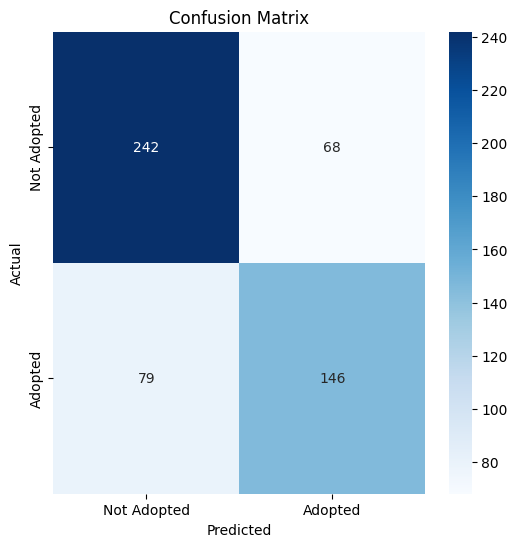

In [66]:
# Предсказание
y_pred_shelter = forest_clf.predict(X_test_shelter)

# Метрики качества
accuracy_2 = accuracy_score(y_test_shelter, y_pred_shelter)
f1_2 = f1_score(y_test_shelter, y_pred_shelter)
recall_2 = recall_score(y_test_shelter, y_pred_shelter)
precision_2 = precision_score(y_test_shelter, y_pred_shelter)

print(f"Accuracy: {accuracy_2:.2f}")
print(f"F1 Score: {f1_2:.2f}")
print(f"Recall: {recall_2:.2f}")
print(f"Precision: {precision_2:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_shelter, y_pred_shelter)

# Визуализация Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Регрессия

In [67]:
# Предсказание
y_pred_house = forest_reg.predict(X_test_house)

# Метрики качества
mae_2 = mean_absolute_error(y_test_house, y_pred_house)
rmse_2 = root_mean_squared_error(y_test_house, y_pred_house)
r2_2 = r2_score(y_test_house, y_pred_house)

print(f"Mean Absolute Error (MAE): {mae_2}")
print(f"Root Mean Squared Error (RMSE): {rmse_2}")
print(f"R-squared (R^2): {r2_2}")

Mean Absolute Error (MAE): 177743.63545034642
Root Mean Squared Error (RMSE): 289518.12696304836
R-squared (R^2): 0.293316897462499


### d. Сравнение результатов первоначального бейзлайна и имплементированных моделей

Классификация

In [68]:
print(f"Разница в accuracy: {accuracy_2 - accuracy}")
print(f"Разница в F1 Score: {f1_2 - f1}")

Разница в accuracy: -0.01869158878504673
Разница в F1 Score: -0.014008844883784177


Регрессия

In [69]:
print(f"Разница в MAE: {mae_2 - mae}")
print(f"Разница в RMSE: {rmse_2 - rmse}")
print(f"Разница в R^2: {r2_2 - r2}")

Разница в MAE: 44286.65937644342
Разница в RMSE: 94585.67773427011
Разница в R^2: -0.38632075662964016


### e. Выводы

Точность имплементированной модели для задачи классификации оказалась хуже, чем для встроенной модели. Особенно пострадал Recall

В случае с линейной регрессией, ошибки увеличились, а R^2 стал заметно ниже

### f. Добавление техник из улучшенного бейзлайна

Классификация

In [ ]:
# Загрузка данных
shelter_data = pd.read_csv('../datasets/shelter_animal_outcomes.csv')

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Создание нового признака: возраст животного в днях
def age_in_days(age_str):
    if isinstance(age_str, str):
        num, unit = age_str.split()
        num = int(num)
        if 'year' in unit:
            return num * 365
        elif 'month' in unit:
            return num * 30
        elif 'week' in unit:
            return num * 7
        elif 'day' in unit:
            return num
    return 0

X_shelter['AgeInDays'] = shelter_data['AgeuponOutcome'].apply(age_in_days)

# Бинарное кодирование типа животного
X_shelter['IsDog'] = (shelter_data['AnimalType'] == 'Dog').astype(int)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

# Масштабирование
scaler_shelter = StandardScaler()
X_train_shelter = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter = scaler_shelter.transform(X_test_shelter)

forest_clf = RandomForestClassifierCustom(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200)

Регрессия

In [ ]:
# Загрузка данных
house_data = pd.read_csv('../datasets/kc_house_data.csv')

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная


# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Нормализация числовых признаков (важно для KNN)
scaler = StandardScaler()
X_house_scaled = pd.DataFrame(scaler.fit_transform(X_house), columns=X_house.columns)

# Создание нового признака: общая площадь дома
X_house['total_area'] = X_house['sqft_living'] + X_house['sqft_basement']

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler = StandardScaler()
X_train_house = scaler.fit_transform(X_train_house)
X_test_house = scaler.transform(X_test_house)

forest_reg = RandomForestRegressorCustom(max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200)

### g. Обучение на улучшенном бейзлайне

Классификация

In [72]:
forest_clf.fit(X_train_shelter, y_train_shelter)

Регрессия

In [75]:
forest_reg.fit(X_train_house, y_train_house)

### h. Оценка качества моделей на улучшенном бейзлайне

Классификация

Accuracy: 0.72
F1 Score: 0.66
Recall: 0.65
Precision: 0.67


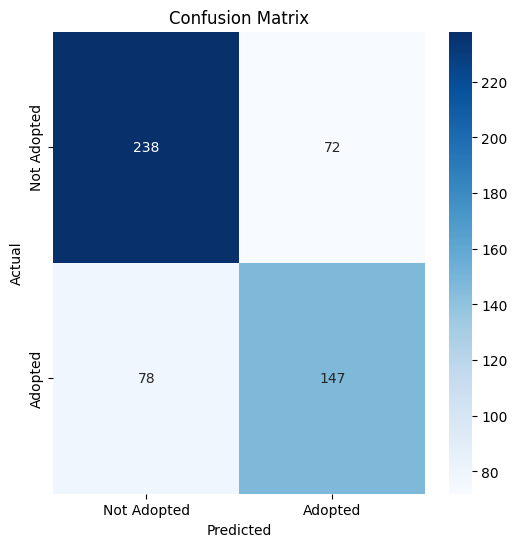

In [76]:
# Предсказание
y_pred_shelter_best = forest_clf.predict(X_test_shelter)

# Метрики качества
accuracy_2_best = accuracy_score(y_test_shelter, y_pred_shelter_best)
f1_2_best = f1_score(y_test_shelter, y_pred_shelter_best)
recall_2_best = recall_score(y_test_shelter, y_pred_shelter_best)
precision_2_best = precision_score(y_test_shelter, y_pred_shelter_best)

print(f"Accuracy: {accuracy_2_best:.2f}")
print(f"F1 Score: {f1_2_best:.2f}")
print(f"Recall: {recall_2_best:.2f}")
print(f"Precision: {precision_2_best:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_shelter, y_pred_shelter_best)

# Визуализация Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Регрессия

In [77]:
# Предсказание
y_pred_house_best = forest_reg.predict(X_test_house)

# Метрики качества
mae_2_best = mean_absolute_error(y_test_house, y_pred_house_best)
rmse_2_best = root_mean_squared_error(y_test_house, y_pred_house_best)
r2_2_best = r2_score(y_test_house, y_pred_house_best)

print(f"Mean Absolute Error (MAE): {mae_2_best}")
print(f"Root Mean Squared Error (RMSE): {rmse_2_best}")
print(f"R-squared (R^2): {r2_2_best}")

Mean Absolute Error (MAE): 159712.02410279136
Root Mean Squared Error (RMSE): 302397.01062537555
R-squared (R^2): 0.22904651963244893


### i. Сравнение результатов первоначального бейзлайна с улучшенным

Классификация

In [78]:
print(f"Разница в accuracy: {accuracy_2_best - accuracy_best}")
print(f"Разница в F1 Score: {f1_2_best - f1_best}")

Разница в accuracy: -0.020560747663551426
Разница в F1 Score: -0.010779014308426094


Регрессия

In [79]:
print(f"Разница в MAE: {mae_2_best - mae_best}")
print(f"Разница в MSE: {rmse_2_best - rmse_best}")
print(f"Разница в R^2: {r2_2_best - r2_best}")

Разница в MAE: 29863.56709294989
Разница в MSE: 112019.46738570093
Разница в R^2: -0.4653877665657523


### j. Выводы

Точность имплементированной модели с улучшениями для задачи классификации оказалась лучше встроенной модели

Ошибки в имплементированной модели с улучшениями увеличились, R^2 очень сильно упал. Скорее всего это связано с тем, что были неправильно подобраны гиперпараметры